In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
from sklearn import datasets

iris = datasets.load_iris() # return_X_y=True, as_frame=True
iris
print(iris.keys()) 
from pprint import pprint
pprint(iris) 

print(iris['data'])
print('- - - - - ')
print(iris['feature_names'])

print(iris['target'])
print('- - - - - ')
print(iris['target_names'])

# print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '                \n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== =====

In [13]:
# X = iris.data
# X
y = iris.target
y
# type(X) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# data = pd.DataFrame(X, columns=iris.feature_names)
# data['target'] = iris.target 
data['target'] = data['target'].replace({0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'})
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
# y
X.shape, y.shape 
# X_train

((150, 4), (150,))

In [20]:
# Vérifier la répartition sur y (la pop générale)
# pd.Series(y).value_counts(normalize=True)
pd.value_counts(y, normalize=True).round(2) * 100 

0    33.0
1    33.0
2    33.0
dtype: float64

Q : Nous allons réappliquer le KMeans sur iris datasets (pour voir si l'algo réussi à déterminer correctement les 3 classes) ? 

In [22]:
# km = KMeans(n_clusters=3, random_state=42)
# km
km.fit(X)

KMeans(n_clusters=3, random_state=42)

In [23]:
# label_orig = 'setosa' 'versicolor' 'virginica'
km.labels_
# {1:'setosa', 0:'versicolor', 2:'virginica'}

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
data['cl_km'] = km.labels_
data['cl_km'] = data['cl_km'].replace({1:'setosa', 0:'versicolor', 2:'virginica'})
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cl_km
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,virginica
146,6.3,2.5,5.0,1.9,virginica,versicolor
147,6.5,3.0,5.2,2.0,virginica,virginica
148,6.2,3.4,5.4,2.3,virginica,virginica


In [27]:
pd.crosstab(data['target'], data['cl_km'])

cl_km,setosa,versicolor,virginica
target,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

In [24]:
pd.DataFrame(y_test)

,0
0,2
1,1
2,0
3,1
4,2
5,1
6,1
7,0
8,1
9,1


In [25]:
# Vérifier la répartition sur y_train
pd.Series(y_train).value_counts(normalize=True)

0    0.34
2    0.33
1    0.33
dtype: float64

In [26]:
# Vérifier la répartition sur y_test
pd.Series(y_test).value_counts(normalize=True)

2    0.34
1    0.34
0    0.32
dtype: float64

In [27]:
print(X_train.shape) ; print(y_train.shape) ; print(X_test.shape) ; print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [32]:
y_train

array([2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2,
       1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [39]:
X_test

array([[6.3, 2.8, 5.1, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [5. , 3.4, 1.5, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [7.3, 2.9, 6.3, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [5.7, 2.8, 4.5, 1.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.6, 3. , 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 3.4, 1.5, 0.2],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6. , 3. , 4.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 2.8, 4.1, 1.3],
       [6.5, 3. , 5.2, 2. ],
       [5.6, 3. , 4.1, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [6.5, 3. , 5.8, 2.2],
       [6.7, 3.1, 5.6, 2.4],
       [5. , 3.2, 1.2, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [6.4, 2.7, 5.3, 1.9],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3

In [28]:
# import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn1

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [32]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [52]:
# knn1.classes_
# knn1.effective_metric_
# knn1.kneighbors()[0]
dist = pd.DataFrame(knn1.kneighbors()[0], columns=['dist'])
dist['neighbor']=knn1.kneighbors()[1]
dist
# knn1.

,dist,neighbor
0,0.387298,38
1,0.100000,90
2,0.000000,47
3,0.387298,27
4,0.223607,99
...,...,...
95,0.223607,90
96,0.282843,67
97,0.200000,30
98,0.670820,44


In [53]:
y_pred = knn1.predict(X_test)
y_pred
# knn1.predict_proba(X_test)

array([1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 1, 2])

In [54]:
y_test

array([2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 2, 1, 2])

In [55]:
# Méthode rapide pr calculer la précision `accuary` du modèle
acc = knn1.score(X_test, y_test)
acc

0.94

In [56]:
# Méthode détaillée pr retrouver l'`accuary`
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

# pd.DataFrame(conf_mat, columns=iris.target_names, index=iris.target_names)

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  3, 14]], dtype=int64)

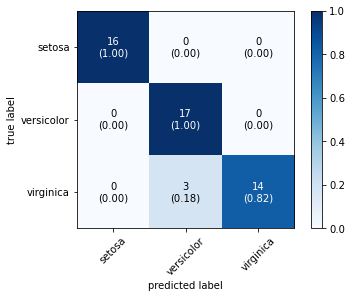

In [41]:
from mlxtend.plotting import plot_confusion_matrix

class_names = iris.target_names

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)

In [64]:
conf_mat.diagonal().sum()/conf_mat.sum()

0.94

In [67]:
err = 1 - acc
err * 100

6.000000000000005

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94

In [58]:
# Boucle à améliorer => k range de nb impair (pr les besoins du vote à majorité)
err_default = 6
neighbors = range(2, 101)
errors = []

for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1) 	# 
	knn.fit(X_train, y_train)
	err = round((1.0 - knn.score(X_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\n\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')



Results : knn = 2 => err_test = 8.0

Improvement of -2.0%




Results : knn = 3 => err_test = 4.0

Improvement of 2.0%




Results : knn = 4 => err_test = 4.0

Improvement of 2.0%




Results : knn = 5 => err_test = 2.0

Improvement of 4.0%




Results : knn = 6 => err_test = 6.0

Improvement of -0.0%




Results : knn = 7 => err_test = 2.0

Improvement of 4.0%




Results : knn = 8 => err_test = 4.0

Improvement of 2.0%




Results : knn = 9 => err_test = 4.0

Improvement of 2.0%




Results : knn = 10 => err_test = 4.0

Improvement of 2.0%




Results : knn = 11 => err_test = 4.0

Improvement of 2.0%




Results : knn = 12 => err_test = 4.0

Improvement of 2.0%




Results : knn = 13 => err_test = 6.0

Improvement of -0.0%




Results : knn = 14 => err_test = 4.0

Improvement of 2.0%




Results : knn = 15 => err_test = 4.0

Improvement of 2.0%




Results : knn = 16 => err_test = 4.0

Improvement of 2.0%




Results : knn = 17 => err_test = 2.0

Improvement of 4.0%




Results : k

Text(0.5, 0, 'neighbors')

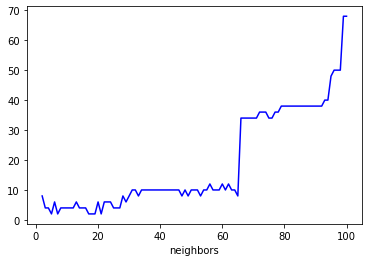

In [59]:
from matplotlib import pyplot as plt

plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')

In [62]:
# df = pd.DataFrame({"neighbors" : neighbors, "errors" : errors})
# df = df.sort_values('errors', ascending=True)
df = df.sort_values(['errors', 'neighbors'], ascending=[True, False])
df.head(15)

,neighbors,errors
19,21,2.0
17,19,2.0
16,18,2.0
15,17,2.0
5,7,2.0
3,5,2.0
25,27,4.0
24,26,4.0
23,25,4.0
14,16,4.0


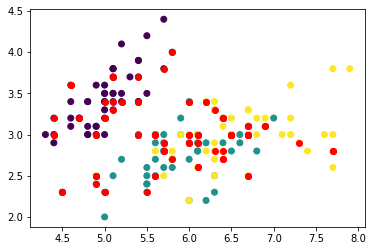

In [96]:
# La question : Dessiner le nuage de points en plaçant dessus les points 
# malclassifiés en rouge!

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = y)
# indice des points mal classés par le clf
miss_class = np.where(y_test != y_pred)
miss_class = miss_class[0].tolist()
# les points mal classés (en rouge)
for idx in miss_class : 
    plt.scatter(X_test[idx:, 0], X_test[idx:, 1], c = 'red')

# Decision Regions 

In [97]:
# Construire le classifier
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn1.fit(X_train[:, [0, 1]], y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

<AxesSubplot:>

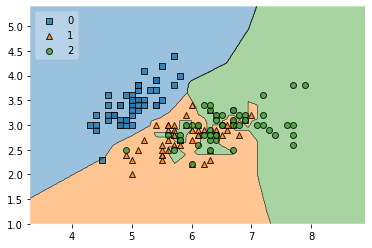

In [98]:
# plot de la Decision Region
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X[:, [0, 1]], y, clf=knn1, legend=2)

<AxesSubplot:>

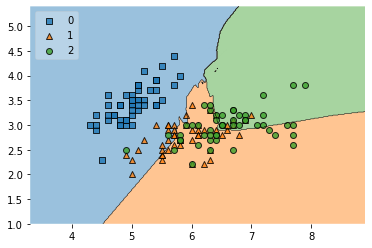

In [100]:
# On cherche à comparer les Decision Regions avec 1 Vs 100 voisions ? 
knn90=KNeighborsClassifier(n_neighbors=90, n_jobs=-1)
knn90.fit(X_train[:, [0, 1]], y_train)
plot_decision_regions(X[:, [0, 1]], y, clf=knn90, legend=2)

<AxesSubplot:>

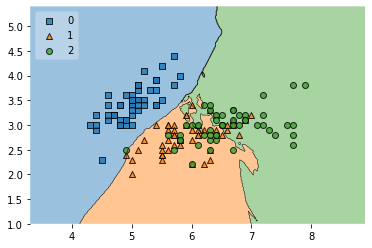

In [101]:
# avec k=21, ns sommes avec acc=2% (le meilleur score)
knn21=KNeighborsClassifier(n_neighbors=21, n_jobs=-1)
knn21.fit(X_train[:, [0, 1]], y_train)
plot_decision_regions(X[:, [0, 1]], y, clf=knn21, legend=2)